# EDA Final Report

Structure of the paper:

Introduction of Air Quality of CA, then introduce the reason that causes the CA's bad air quality. Here we use PM2.5 as the pollutant, as well as combine AQI to say about the air quality issue. Then we can introduce the attributes that cause the bad air quality like wildfire.

We analyzed the past and current state of wildfire ( or other attributes) in CA for the past 10 years, here free to make graphs, or use dataset to state the situation

Introduces the background reason that influences the air quality or wildfire issue, say car flow / population / seasonal patterns, be specific to some counties,

Suggest a project based on the problem statements in part II and III, it can be suggesting pushing policies, or just keeping detecting some of the attributes.

Say something about what expect to see and advance in the future.

Conclusion.



California, known for its large population, diverse geography, and frequent wildfires, is home to several counties that consistently rank among the most polluted in the United States. This persistent issue not only poses significant health risks to residents but also impacts the environment and economy. As one of the most populous states, California faces unique challenges in maintaining air quality due to its high levels of industrial activity, vehicle emissions, and susceptibility to natural events such as wildfires.

The purpose of this analysis is to explore the factors contributing to California’s poor air quality, focusing specifically on PM2.5 as the primary pollutant of interest. PM2.5 is fine particulate matter with a diameter of 2.5 micrometers or less, which is small enough to penetrate deep into the lungs and enter the bloodstream. This pollutant has been associated with severe health consequences, including decreasing lung function, increasing the likelihood of heart attacks, aggravating asthma symptoms, as well as increase mortality in people with heart or lung diseases. We examine the PM2.5 Air Quality Index (AQI), a standardized measure used to communicate daily air quality levels to the public, to better understand the scale and implications of the air quality problem.

Our first data source comes from the United States Environmental Protection Agency website. We downloaded daily PM2.5 data sets for the past 10 years (2015-2024) and concatenated all of the yearly data sets together. The data set contains daily recordings of PM2.5 AQI and concentration across numerous sites in California counties. The concatenated data set contains 535,775 rows and 22 columns. The columns that are most relevant to our analysis are Date, Daily Mean PM2.5 Concentration, Daily AQI Value, and County.

After examining the distribution of Daily AQI Value of PM2.5 in a boxplot, we found that there were unusually large outliers. Since the maximum possible value for AQIs is 500, we dropped the rows in which Daily AQI value exceeded 500. 

We also extracted data from the California DMV website to get information on the number of vehicles registered by county. We downloaded data sets from the years 2015-2023 and concatenated the data sets once again. The relevant columns are Counties, Total Vehicles, and Year. 

First, we examined patterns in PM2.5 concentration over time. In the line plot displaying monthly average PM2.5 AQI over the years, we see that there are peaks in the latter parts of 2017, 2018, 2020, and 2021, with 2020 having the highest peak at an AQI at about 97. These peaks coincide with large wildfires. Between August and December 2020, California experienced the devastating August Complex and North Complex wildfires, among the worst in the state's history. Outside of these peaks, the average monthly AQIs seem to fluctuate between 20 and 50. 

# Data Wrangling

Import Required Packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr


Import PM2.5 Data and Concatenate

In [3]:
pm25_2015 = pd.read_csv("pm2.5_2015.csv")
pm25_2016 = pd.read_csv("pm2.5_2016.csv")
pm25_2017 = pd.read_csv("pm2.5_2017.csv")
pm25_2018 = pd.read_csv("pm2.5_2018.csv")
pm25_2019 = pd.read_csv("pm2.5_2019.csv")
pm25_2020 = pd.read_csv("pm2.5_2020.csv")
pm25_2021 = pd.read_csv("pm2.5_2021.csv")
pm25_2022 = pd.read_csv("pm2.5_2022.csv")
pm25_2023 = pd.read_csv("pm2.5_2023.csv")
pm25_2024 = pd.read_csv("pm2.5_2024.csv")

In [4]:
pm25_data = pd.concat([pm25_2015, pm25_2016, pm25_2017, pm25_2018, pm25_2019, pm25_2020, pm25_2021, pm25_2022, pm25_2023, pm25_2024], ignore_index=True)

Convert Date column to datetime and create columns for year and month

In [5]:
pm25_data["Date"] = pd.to_datetime(pm25_data["Date"])
pm25_data["Year"] = pm25_data["Date"].dt.year
pm25_data["Month"] = pm25_data["Date"].dt.month

In [6]:
pm25_data.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Year,Month
0,2015-01-01,AQS,60010007,3,16.7,ug/m3 LC,65,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
1,2015-01-02,AQS,60010007,3,23.1,ug/m3 LC,77,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
2,2015-01-03,AQS,60010007,3,27.5,ug/m3 LC,85,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
3,2015-01-04,AQS,60010007,3,28.2,ug/m3 LC,87,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
4,2015-01-05,AQS,60010007,3,31.1,ug/m3 LC,92,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1


In [7]:
pm25_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535775 entries, 0 to 535774
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            535775 non-null  datetime64[ns]
 1   Source                          535775 non-null  object        
 2   Site ID                         535775 non-null  int64         
 3   POC                             535775 non-null  int64         
 4   Daily Mean PM2.5 Concentration  535775 non-null  float64       
 5   Units                           535775 non-null  object        
 6   Daily AQI Value                 535775 non-null  int64         
 7   Local Site Name                 533488 non-null  object        
 8   Daily Obs Count                 535775 non-null  int64         
 9   Percent Complete                535775 non-null  float64       
 10  AQS Parameter Code              535775 non-null  int64  

Checking for outliers

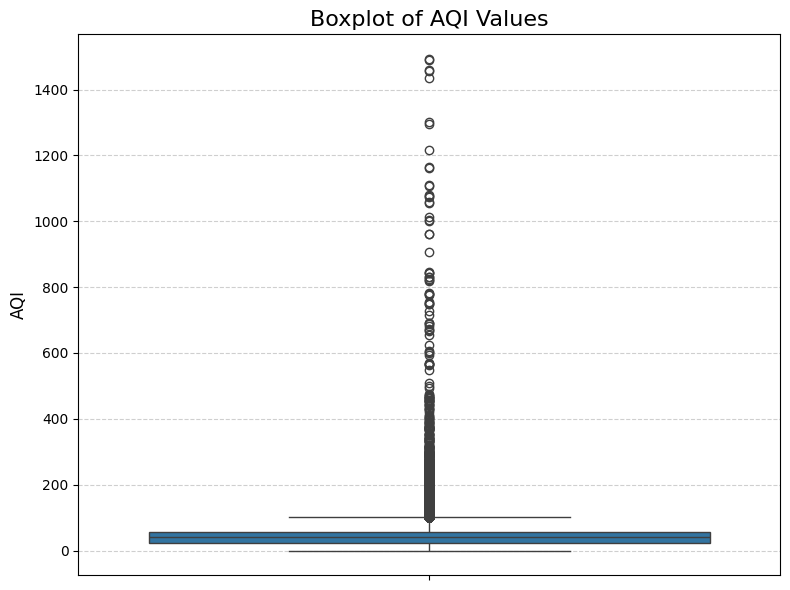

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=pm25_data['Daily AQI Value'])

# Customize the plot
plt.title('Boxplot of AQI Values', fontsize=16)
plt.ylabel('AQI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Remove rows with Daily AQI greater than 500

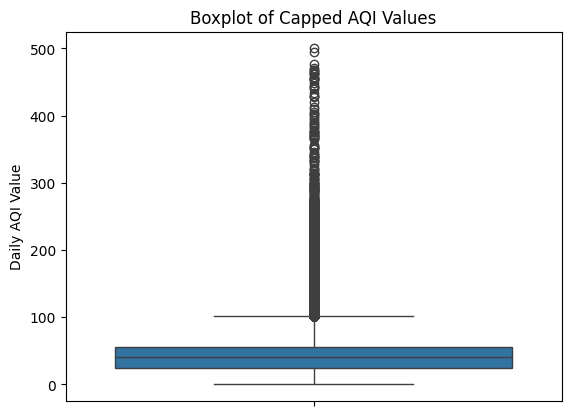

In [9]:
pm25_data = pm25_data.loc[pm25_data['Daily AQI Value'] <= 500]

# Plot a boxplot for the subset
sns.boxplot(y=pm25_data['Daily AQI Value'])
plt.title("Boxplot of Capped AQI Values")
plt.ylabel("Daily AQI Value")
plt.show()


Plotting distribution of AQI values by year

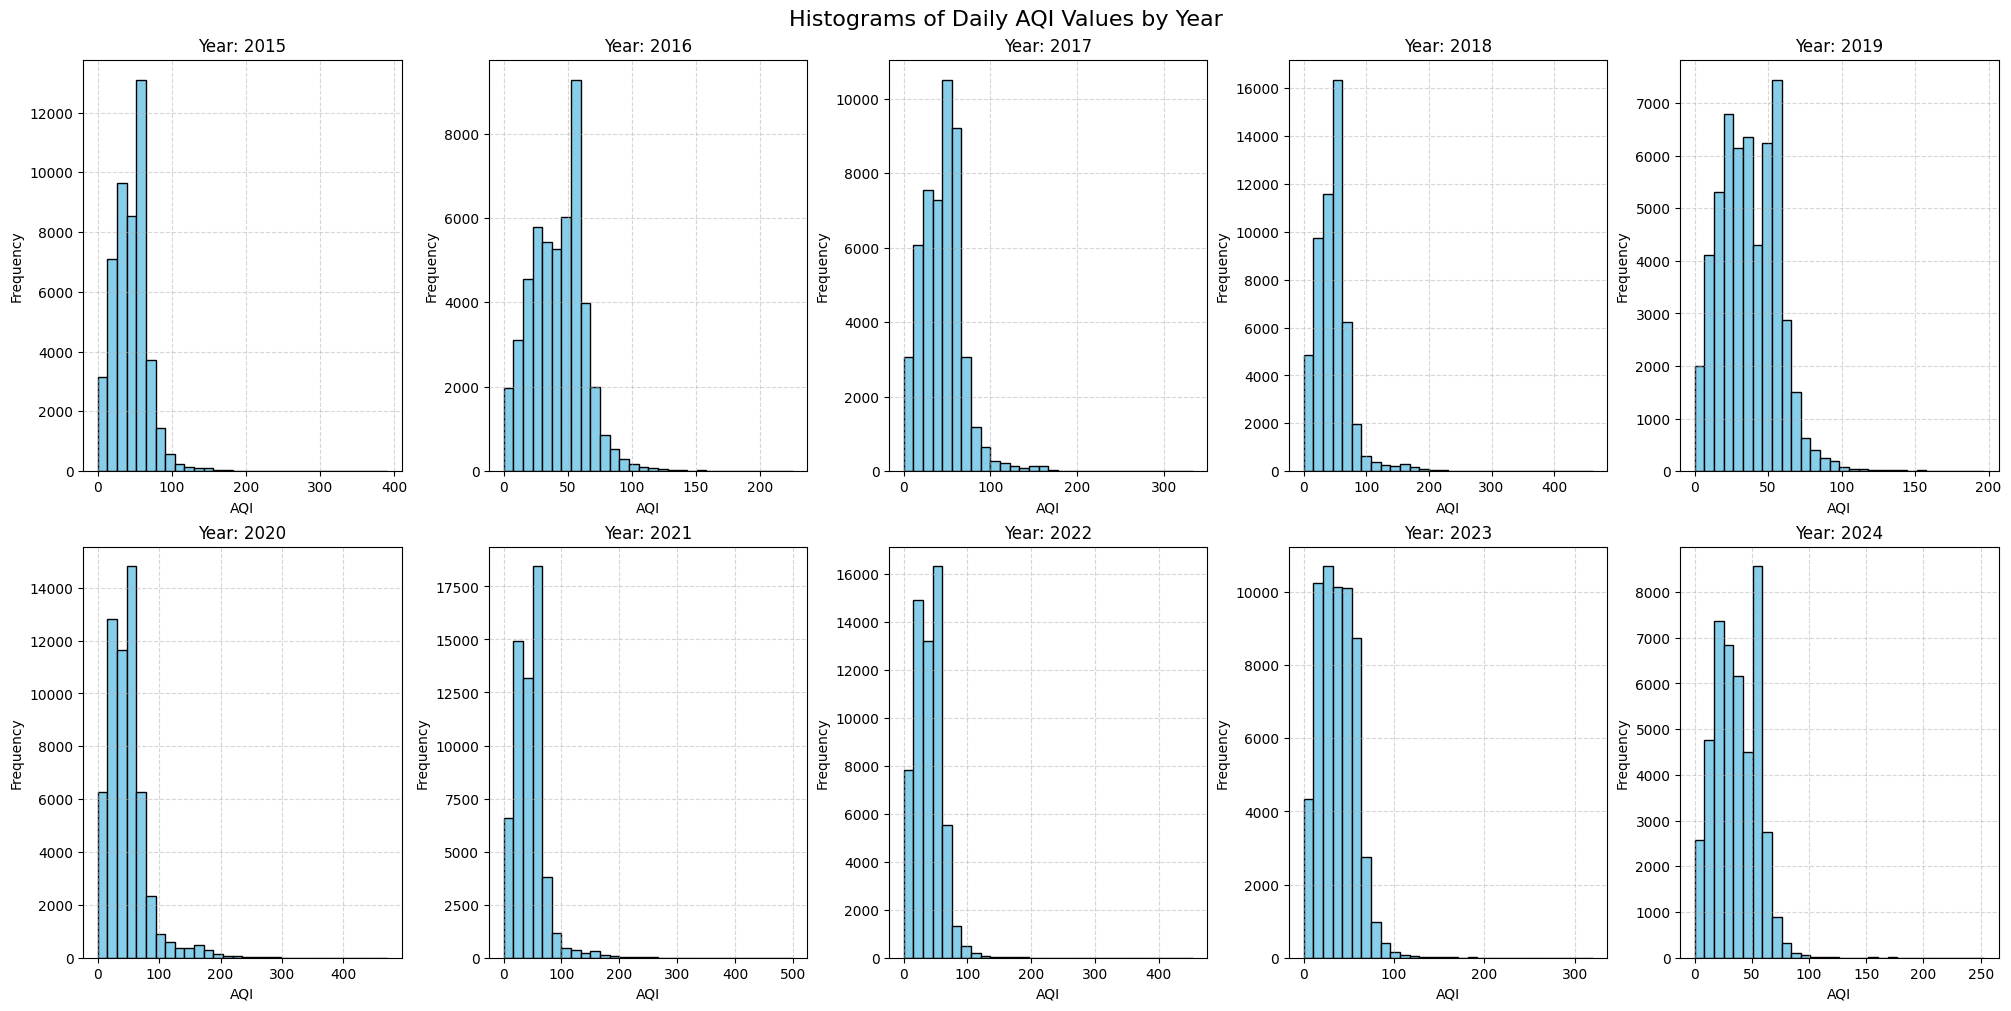

In [272]:
# Extract unique years
unique_years = sorted(pm25_data['Year'].unique())

# Create subplots for histograms
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

# Loop through each year and plot histogram
for i, year in enumerate(unique_years):
    row, col = divmod(i, 5)  # Determine the subplot position
    ax = axes[row, col]
    
    # Filter data for the specific year
    year_data = pm25_data[pm25_data['Year'] == year]
    
    # Plot histogram for AQI values
    ax.hist(year_data['Daily AQI Value'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Year: {year}', fontsize=12)
    ax.set_xlabel('AQI', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.5, linestyle='--')

# Add a global title
fig.suptitle('Histograms of Daily AQI Values by Year', fontsize=16)
plt.show()


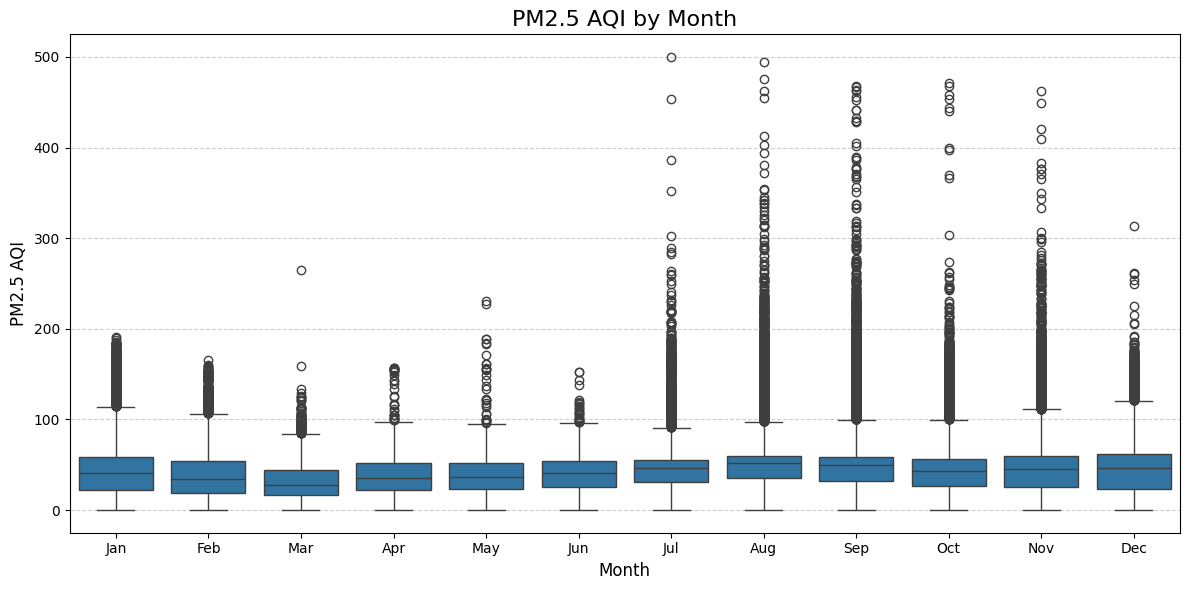

In [260]:
# Create a boxplot for PM2.5 AQI by month
plt.figure(figsize=(12, 6))
sns.boxplot(x=pm25_data['Month'], y=pm25_data['Daily AQI Value'])

# Customize the plot
plt.title('PM2.5 AQI by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


From the histograms and boxplots, we see that the vast majority of AQI values fall between 0 and 100, with outliers reaching up to 500 due to...

Monthly Average PM2.5 AQI by County by Year

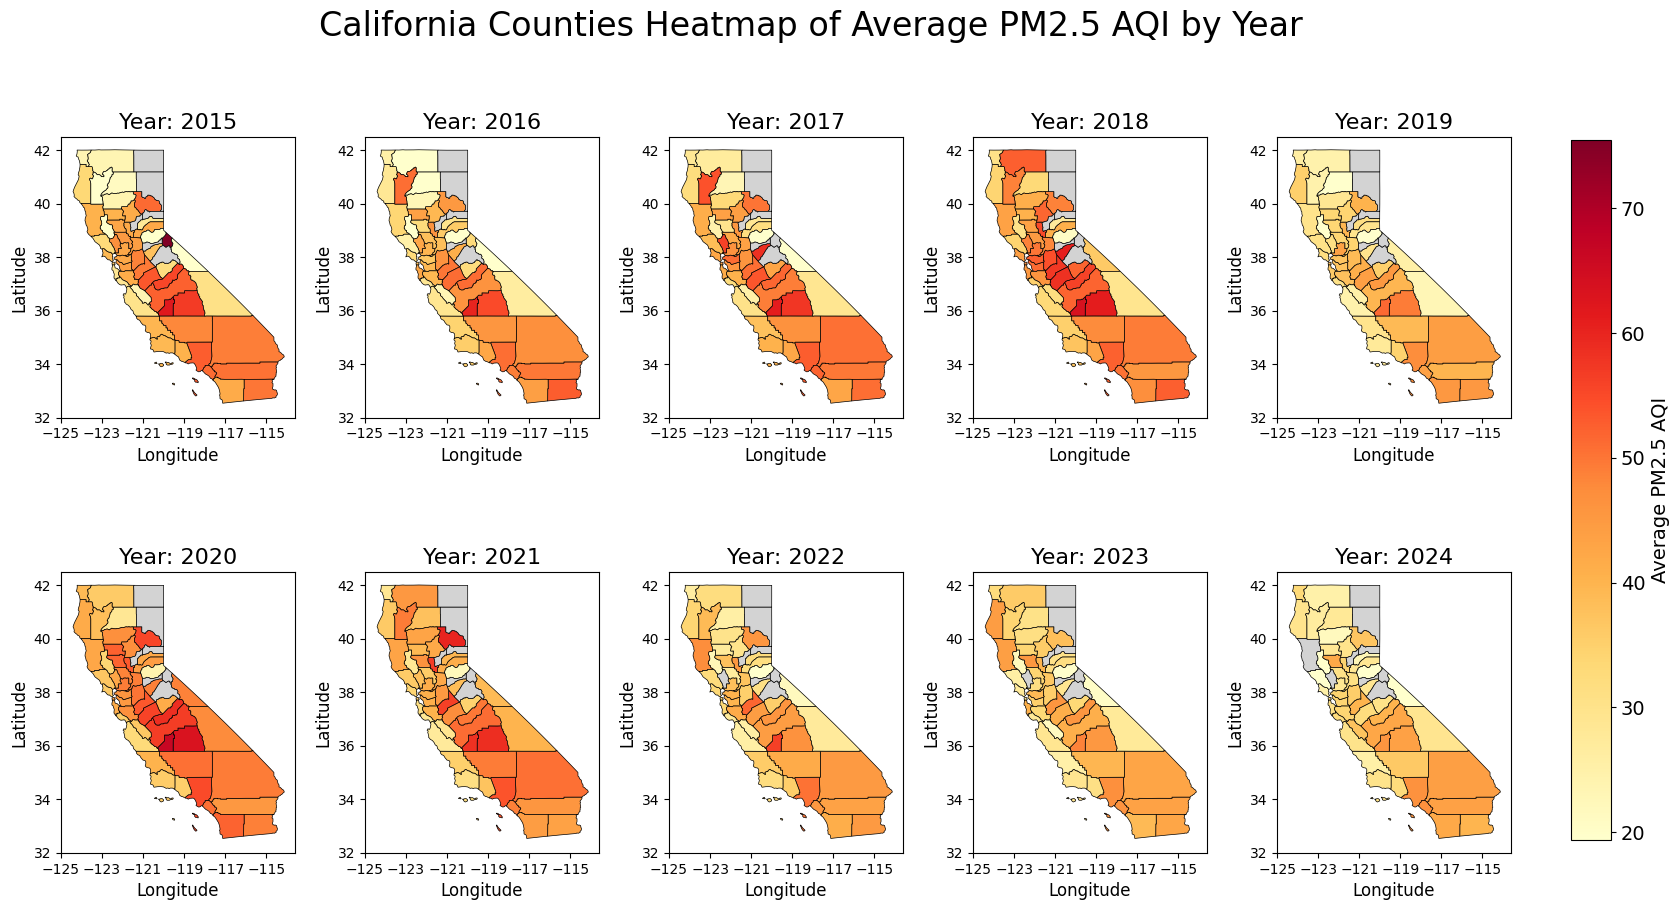

In [ ]:
# Define the tick intervals for longitude and latitude
x_ticks = np.arange(-125, -114, 2)  # Adjust the range and interval as per California's extent
y_ticks = np.arange(32, 43, 2)      # Adjust the range and interval as per California's extent

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust vertical (hspace) and horizontal (wspace) spacing

axes = axes.flatten()

for i, year in enumerate(unique_years):
    # Filter data for the specific year
    yearly_data = pm25_data[pm25_data['Year'] == year]
    county_aqi_year = yearly_data.groupby('County')['Daily AQI Value'].mean().reset_index()
    county_aqi_year.columns = ['NAME', 'Average AQI']  # Match GeoJSON column
    
    # Merge GeoJSON with AQI data
    merged_geo = california_geojson.merge(county_aqi_year, on='NAME', how='left')
    
    # Plot heatmap for the year
    ax = axes[i]
    merged_geo.plot(
        column='Average AQI',
        cmap='YlOrRd',
        legend=False,  # Suppress individual legends
        edgecolor='black',
        linewidth=0.5,
        vmin=vmin,  # Apply consistent vmin
        vmax=vmax,  # Apply consistent vmax
        ax=ax,
        missing_kwds={"color": "lightgrey", "label": "No Data"}
    )
    ax.set_title(f'Year: {year}', fontsize=16)
    ax.set_xticks(x_ticks)  # Set evenly spaced longitude ticks
    ax.set_yticks(y_ticks)  # Set evenly spaced latitude ticks
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to leave space for the color bar
fig.subplots_adjust(right=0.85)  # Shrinks the grid to leave space for the color bar

# Add a single colorbar outside the grid
cax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # Adjust position to the right of the plots
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Dummy array for the colorbar

# Add colorbar with custom label and tick sizes
colorbar = fig.colorbar(sm, cax=cax, label='Average PM2.5 AQI')
colorbar.ax.tick_params(labelsize=14)  # Adjust tick font size
colorbar.set_label('Average PM2.5 AQI', fontsize=14)  # Adjust label font size

plt.suptitle('California Counties Heatmap of Average PM2.5 AQI by Year', fontsize=24)
plt.savefig("aqi_heatmap_by_year.png")
plt.show()


Monthly Average PM2.5 AQI by County Across All Years

<Figure size 1200x800 with 0 Axes>

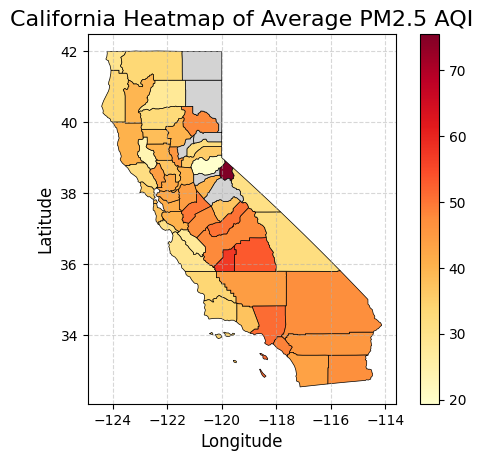

In [75]:
# Group by County and calculate the mean AQI across all years
county_aqi_all_years = pm25_data.groupby('County')['Daily AQI Value'].mean().reset_index()
county_aqi_all_years.columns = ['NAME', 'Average AQI']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with AQI data using the 'NAME' column
merged_geo_all_years = california_geojson.merge(county_aqi_all_years, on='NAME', how='left')

# Plot the heatmap
plt.figure(figsize=(12, 8))
merged_geo_all_years.plot(
    column='Average AQI',
    cmap='YlOrRd',  # Sequential colormap for AQI values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title("California Heatmap of Average PM2.5 AQI", fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("aqi_heatmap_all_years.png")
plt.show()


Monthly Average PM2.5 AQI Over Time

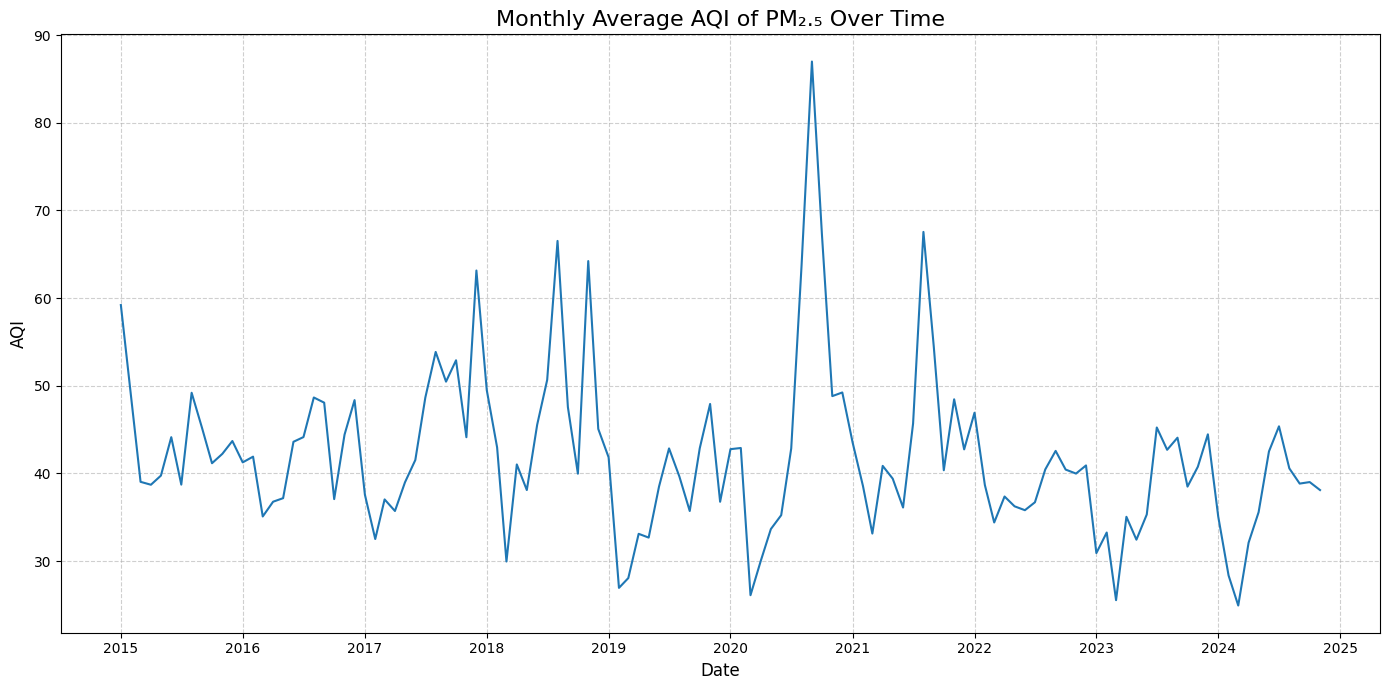

In [275]:
import matplotlib.pyplot as plt

# Prepare the PM2.5 data (using Daily Mean PM2.5 Concentration)
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
pm25_data['YearMonth'] = pm25_data['Date'].dt.to_period('M')
pm25_monthly_avg = pm25_data.groupby('YearMonth')['Daily AQI Value'].mean().reset_index()
pm25_monthly_avg['YearMonth'] = pm25_monthly_avg['YearMonth'].dt.to_timestamp()
pm25_monthly_avg.columns = ['YearMonth', 'PM2.5']  # Rename for consistency

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(pm25_monthly_avg["YearMonth"], pm25_monthly_avg['PM2.5'])

# Customize the plot
plt.title('Monthly Average AQI of PM₂.₅ Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



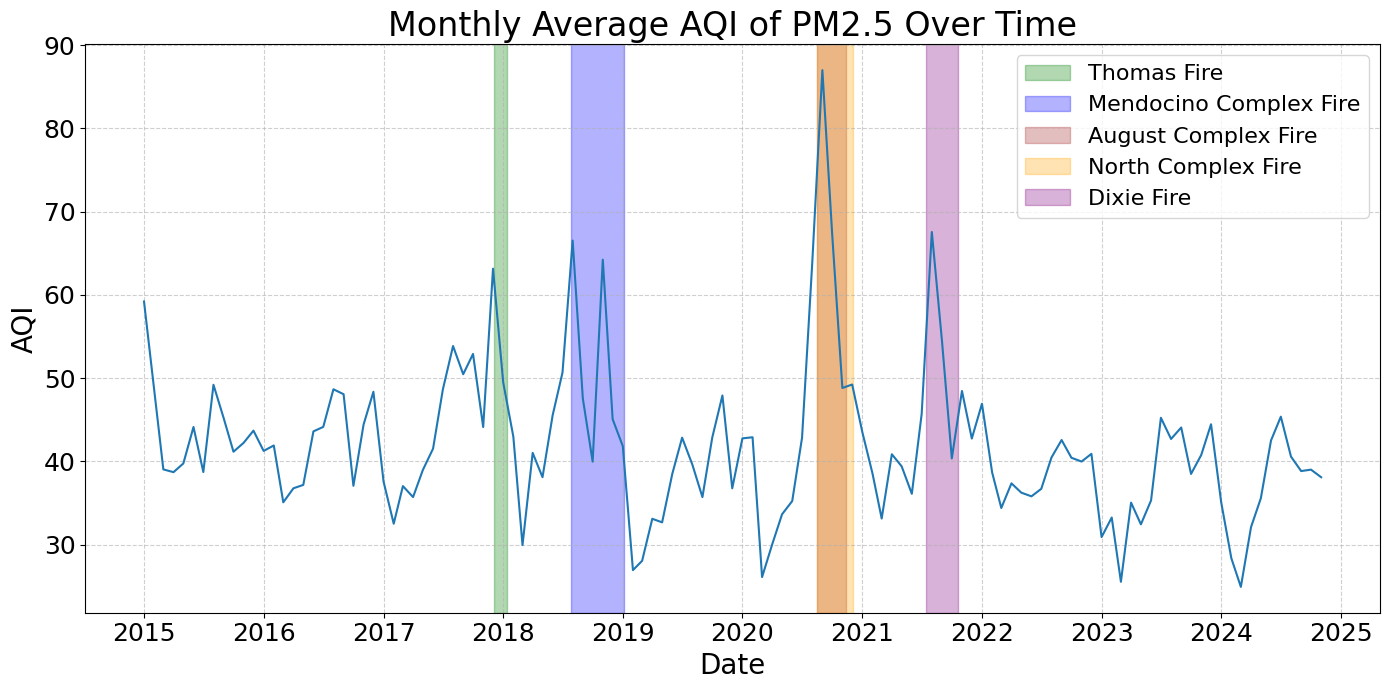

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace this with your actual data)
# pm25_data = pd.read_csv('your_data.csv')  # Load your data here

# Prepare the PM2.5 data (using Daily Mean PM2.5 Concentration)
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
pm25_data['YearMonth'] = pm25_data['Date'].dt.to_period('M')
pm25_monthly_avg = pm25_data.groupby('YearMonth')['Daily AQI Value'].mean().reset_index()
pm25_monthly_avg['YearMonth'] = pm25_monthly_avg['YearMonth'].dt.to_timestamp()
pm25_monthly_avg.columns = ['YearMonth', 'PM2.5']  # Rename for consistency

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(pm25_monthly_avg["YearMonth"], pm25_monthly_avg['PM2.5'])

# Add shaded blocks
plt.axvspan('2017-12-04', '2018-01-12', color='green', alpha=0.3, label='Thomas Fire')
plt.axvspan('2018-07-27', '2019-01-04', color='blue', alpha=0.3, label='Mendocino Complex Fire')
plt.axvspan('2020-08-16', '2020-11-12', color='brown', alpha=0.3, label='August Complex Fire')
plt.axvspan('2020-08-17', '2020-12-03', color='orange', alpha=0.3, label='North Complex Fire')
plt.axvspan('2021-07-13', '2021-10-21', color='purple', alpha=0.3, label='Dixie Fire')

# Customize the plot
plt.title('Monthly Average AQI of PM2.5 Over Time', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('AQI', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the legend
plt.legend(fontsize=16)

# Show the plot
plt.savefig("avg_pm25_time_series.png")
plt.show()


In [180]:
pip install charset-normalizer


Note: you may need to restart the kernel to use updated packages.


In [23]:
from charset_normalizer import detect

with open("dmv2015.csv", "rb") as file:
    raw_data = file.read()
    result = detect(raw_data)
    print(result)


{'encoding': 'UTF-16', 'language': 'Hungarian', 'confidence': 1.0}


Importing and concatenating car data

In [24]:
car_data2015 = pd.read_csv("dmv2015.csv", encoding = 'UTF-16', sep="\t")
car_data2016 = pd.read_csv("dmv2016.csv", encoding = 'UTF-16', sep="\t")
car_data2017 = pd.read_csv("dmv2017.csv", encoding = 'UTF-16', sep="\t")
car_data2018 = pd.read_csv("dmv2018.csv", encoding = 'UTF-16', sep="\t")
car_data2019 = pd.read_csv("dmv2019.csv", encoding = 'UTF-16', sep="\t")
car_data2020 = pd.read_csv("dmv2020.csv", encoding = 'UTF-16', sep="\t")
car_data2021 = pd.read_csv("dmv2021.csv", encoding = 'UTF-16', sep="\t")
car_data2022 = pd.read_csv("dmv2022.csv", encoding = 'UTF-16', sep="\t")
car_data2023 = pd.read_csv("dmv2023.csv", encoding = 'UTF-16', sep="\t")

# List of dataframes and corresponding years
dataframes = [
    (car_data2015, 2015),
    (car_data2016, 2016),
    (car_data2017, 2017),
    (car_data2018, 2018),
    (car_data2019, 2019),
    (car_data2020, 2020),
    (car_data2021, 2021),
    (car_data2022, 2022),
    (car_data2023, 2023),
]

# Add a 'Year' column to each dataset
for df, year in dataframes:
    df['Year'] = year

# Concatenate all dataframes into a single dataset
car_data = pd.concat([df for df, _ in dataframes], ignore_index=True)

# Preview the combined dataset
car_data.head()


,Counties,Autos,Trucks,Trailers,Motorcycles,Total Vehicles,Year
0,ALAMEDA,"1,082,464","178,753","60,858","34,267","1,356,342",2015
1,ALPINE,"2,801","1,121",403,79,"4,404",2015
2,AMADOR,"28,445","15,123","10,688","2,134","56,390",2015
3,BUTTE,"125,799","53,422","45,407","7,530","232,158",2015
4,CALAVERAS,"36,866","19,681","15,579","2,950","75,076",2015


Data Cleaning

In [27]:
# Dropping rows without information on county
rows_to_drop = ['Out Of State', 'Misc Vehicles *', 'Fee Exempt Vehicles', 'Statewide', 'Irp Vehicles **']

car_data.drop(car_data[car_data['Counties'].isin(rows_to_drop)].index, inplace=True)



In [28]:
# Changing county names from all capital to title format
car_data['Counties'] = car_data['Counties'].str.title()

# Converting numerical string values to integers
for col in ['Autos', 'Trucks', 'Trailers', 'Motorcycles',
       'Total Vehicles', 'Year']:
    car_data[col] = car_data[col].astype(str).str.replace(",", "").astype(int)

In [29]:
car_data.head()

,Counties,Autos,Trucks,Trailers,Motorcycles,Total Vehicles,Year
0,Alameda,1082464,178753,60858,34267,1356342,2015
1,Alpine,2801,1121,403,79,4404,2015
2,Amador,28445,15123,10688,2134,56390,2015
3,Butte,125799,53422,45407,7530,232158,2015
4,Calaveras,36866,19681,15579,2950,75076,2015


Bar plot of average number of vehicles registered by county

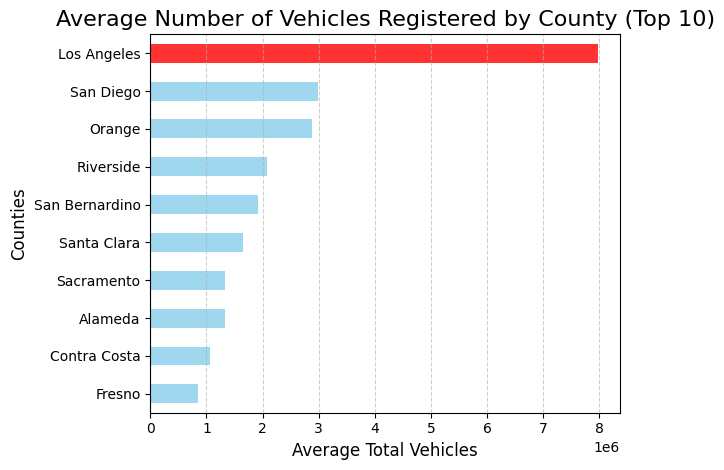

In [78]:
# Calculate average number of total vehicles across all years and sort
avg_total_vehicles = (
    car_data.groupby('Counties')['Total Vehicles'].mean().sort_values(ascending=True)
).tail(10)  # Select top 10 counties

# Assign colors: 'red' for Los Angeles, 'skyblue' for others
bar_colors = ['red' if county == 'Los Angeles' else 'skyblue' for county in avg_total_vehicles.index]

# Plot the sorted horizontal barplot of average total vehicles
avg_total_vehicles.plot(kind='barh', color=bar_colors, alpha=0.8)
plt.title('Average Number of Vehicles Registered by County (Top 10)', fontsize=16)
plt.xlabel('Average Total Vehicles', fontsize=12)
plt.ylabel('Counties', fontsize=12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig("car_barplot.png", bbox_inches='tight')
plt.show()

Bar plot of average number of vehicles registered by county

<Figure size 1200x800 with 0 Axes>

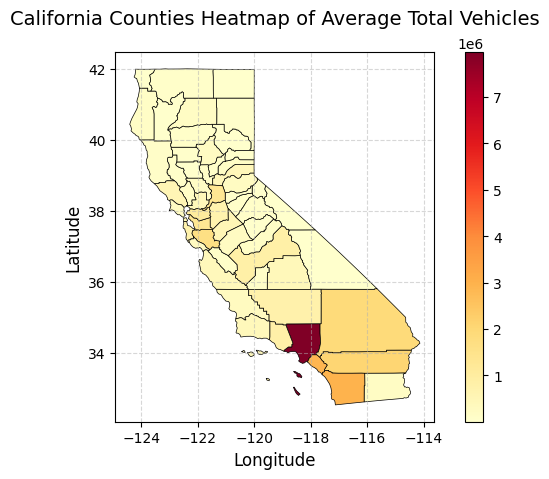

In [74]:
# Group car data by 'Counties' and calculate the average 'Total Vehicles'
county_vehicle_data = car_data.groupby('Counties')['Total Vehicles'].mean().reset_index()
county_vehicle_data.columns = ['NAME', 'Average Total Vehicles']

# Merge GeoJSON with car data using the 'NAME' column
merged_geo_car_data = california_geojson.merge(county_vehicle_data, on='NAME', how='left')

# Plot the heatmap
plt.figure(figsize=(12, 8))
merged_geo_car_data.plot(
    column='Average Total Vehicles',
    cmap='YlOrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

# Adjust layout to avoid overlap
plt.title('California Counties Heatmap of Average Total Vehicles', fontsize=14, pad=20)  # Add padding
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust spacing for the color bar and title
plt.tight_layout()  # Automatically adjust spacing
plt.subplots_adjust(top=0.9)  # Manually adjust top margin

plt.savefig("car_heatmap_all_years.png")
plt.show()


Scatter plot of PM2.5 concentration vs average number of registered vehicles

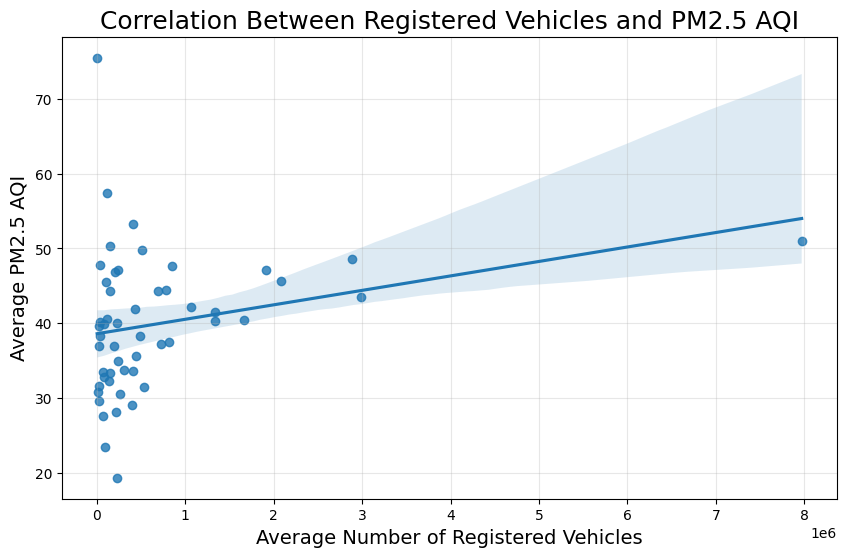

In [82]:
# Clean and aggregate PM2.5 data by county
pm25_by_county = pm25_data.groupby('County')['Daily AQI Value'].mean().reset_index()
pm25_by_county.columns = ['County', 'Average PM2.5']

# Clean and aggregate vehicle data by county
vehicle_by_county = car_data.groupby('Counties')['Total Vehicles'].mean().reset_index()
vehicle_by_county.columns = ['County', 'Average Vehicles']

# Merge datasets on county names
merged_data = pd.merge(vehicle_by_county, pm25_by_county, on='County', how='inner')

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Average Vehicles',
    y='Average PM2.5',
    data=merged_data,
)
plt.title("Correlation Between Registered Vehicles and PM2.5 AQI", fontsize=18)
plt.xlabel('Average Number of Registered Vehicles', fontsize=14)
plt.ylabel('Average PM2.5 AQI', fontsize=14)
plt.grid(alpha=0.3)
plt.savefig("car_pm25_scatterplot.png", bbox_inches='tight')
plt.show()


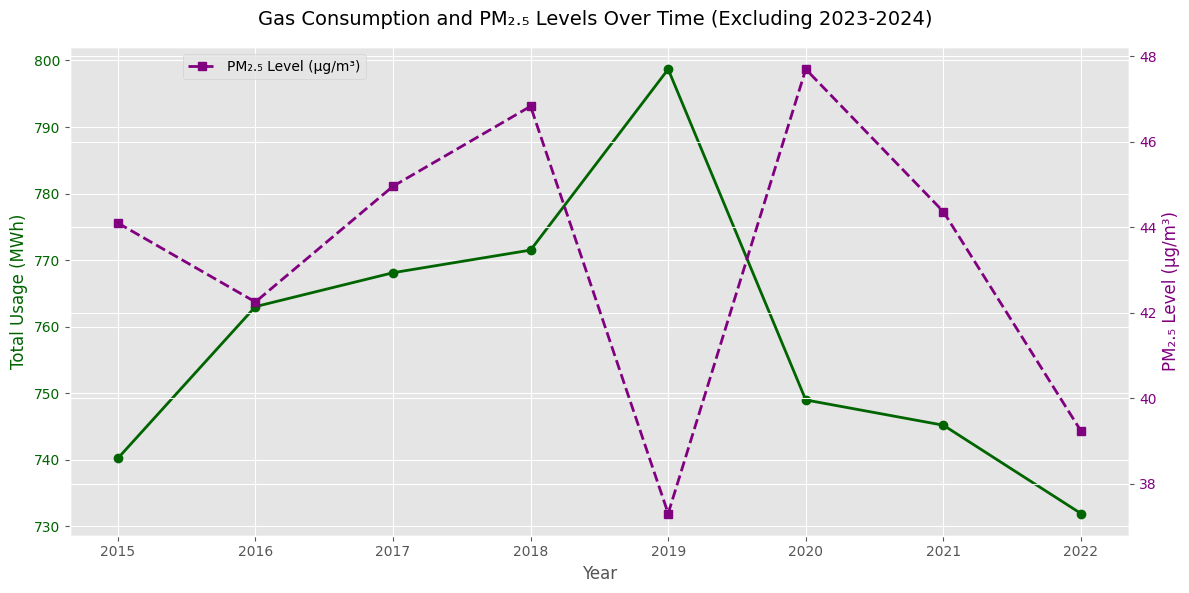

In [88]:
# Load datasets
gas_data = pd.read_csv('GasByUtility.csv')

# Ensure 'Year' column exists in gas_data by extracting from a date column if necessary
if 'Date' in gas_data.columns:
    gas_data['Year'] = pd.to_datetime(gas_data['Date']).dt.year

# Aggregate gas data by year (average usage)
gas_aggregated = gas_data.groupby('Year', as_index=False).agg({'Total Usage': 'mean'})

# Extract year from the 'Date' column in PM2.5 data
pm25_data['Year'] = pm25_data['Date'].dt.year

# Aggregate PM2.5 data by year (mean values for PM2.5 levels)
pm25_aggregated = pm25_data.groupby('Year', as_index=False).agg({'Daily AQI Value': 'mean'})

# Merge datasets on 'Year' column
merged_data = pd.merge(pm25_aggregated, gas_aggregated, on='Year', how='left')

# Remove years 2023 and 2024 from gas data and merged data
merged_data = merged_data[~merged_data['Year'].isin([2023, 2024])]

# Use a valid style for better aesthetics
plt.style.use('ggplot')  # A built-in Matplotlib style
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot gas consumption
ax1.plot(
    merged_data['Year'],
    merged_data['Total Usage'],
    color='darkgreen',
    linewidth=2,
    marker='o',
    label='Gas Consumption (MWh)'
)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Usage (MWh)', color='darkgreen', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkgreen', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

# Plot PM2.5 levels
ax2 = ax1.twinx()
ax2.plot(
    merged_data['Year'],
    merged_data['Daily AQI Value'],
    color='purple',
    linewidth=2,
    linestyle='--',
    marker='s',
    label='PM₂.₅ Level (µg/m³)'
)
ax2.set_ylabel('PM₂.₅ Level (µg/m³)', color='purple', fontsize=12)
ax2.tick_params(axis='y', labelcolor='purple', labelsize=10)

# Add title and legend
fig.suptitle('Gas Consumption and PM₂.₅ Levels Over Time (Excluding 2023-2024)', fontsize=14)
fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1), fontsize=10)
plt.show()


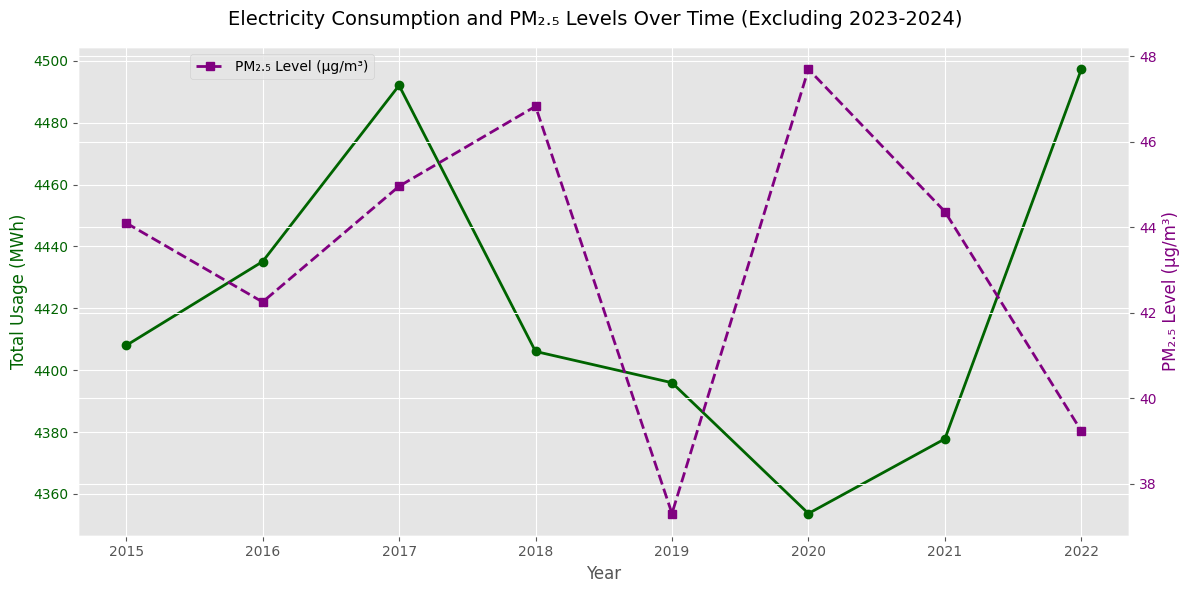

In [87]:
# Load datasets
electricity_data = pd.read_csv('ElectricityByUtility.csv')

# Ensure 'Year' column exists in electricity_data by extracting from a date column if necessary
if 'Date' in electricity_data.columns:
    electricity_data['Year'] = pd.to_datetime(electricity_data['Date']).dt.year

# Aggregate electricity data by year (average usage)
electricity_aggregated = electricity_data.groupby('Year', as_index=False).agg({'Total Usage': 'mean'})

# Extract year from the 'Date' column in PM2.5 data
pm25_data['Year'] = pm25_data['Date'].dt.year

# Aggregate PM2.5 data by year (mean values for PM2.5 levels)
pm25_aggregated = pm25_data.groupby('Year', as_index=False).agg({'Daily AQI Value': 'mean'})

# Merge datasets on 'Year' column
merged_data = pd.merge(pm25_aggregated, electricity_aggregated, on='Year', how='left')

# Remove years 2023 and 2024 from electricity data and merged data
merged_data = merged_data[~merged_data['Year'].isin([2023, 2024])]

# Use a valid style for better aesthetics
plt.style.use('ggplot')  # A built-in Matplotlib style
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot electricity consumption
ax1.plot(
    merged_data['Year'],
    merged_data['Total Usage'],
    color='darkgreen',
    linewidth=2,
    marker='o',
    label='Electricity Consumption (MWh)'
)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Usage (MWh)', color='darkgreen', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkgreen', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

# Plot PM2.5 levels
ax2 = ax1.twinx()
ax2.plot(
    merged_data['Year'],
    merged_data['Daily AQI Value'],
    color='purple',
    linewidth=2,
    linestyle='--',
    marker='s',
    label='PM₂.₅ Level (µg/m³)'
)
ax2.set_ylabel('PM₂.₅ Level (µg/m³)', color='purple', fontsize=12)
ax2.tick_params(axis='y', labelcolor='purple', labelsize=10)

# Add title and legend
fig.suptitle('Electricity Consumption and PM₂.₅ Levels Over Time (Excluding 2023-2024)', fontsize=14)
fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1), fontsize=10)
plt.show()

